In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df_churn=pd.read_csv(r"C:\Users\sm983\Desktop\Machine Learning Projects\Classification_project-1\Telecom_churn.csv")
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)

In [4]:
df_churn.shape

(7043, 21)

In [5]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

In [8]:
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df_churn['TotalCharges'].fillna(df_churn['TotalCharges'].mean(),inplace=True)

In [10]:
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df_churn.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


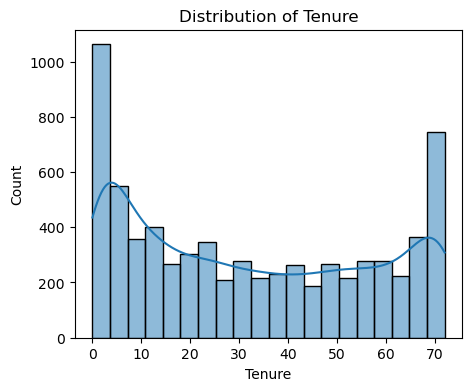

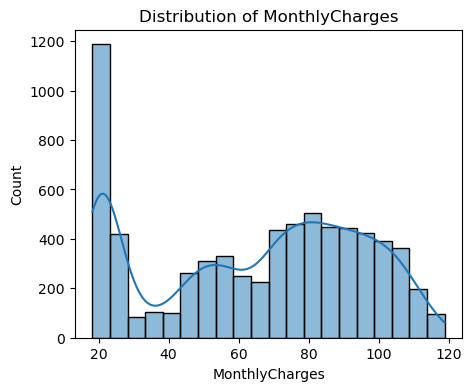

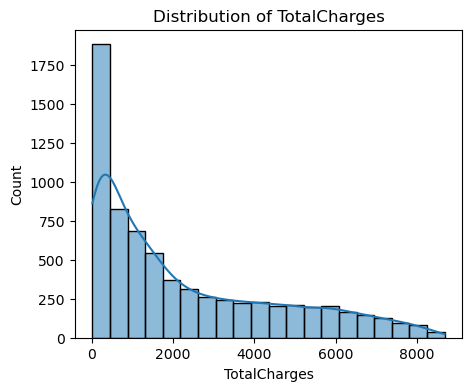

In [13]:
#distribution plot for numeric varaibles:

import seaborn as sns
import matplotlib.pyplot as plt

# Numerical Features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Distribution Plot for Tenure
plt.figure(figsize=(5, 4))
sns.histplot(df_churn['tenure'], kde=True, bins=20)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.show()

# Distribution Plot for MonthlyCharges
plt.figure(figsize=(5, 4))
sns.histplot(df_churn['MonthlyCharges'], kde=True, bins=20)
plt.title('Distribution of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.show()

# Distribution Plot for TotalCharges
plt.figure(figsize=(5, 4))
sns.histplot(df_churn['TotalCharges'], kde=True, bins=20)
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.show()


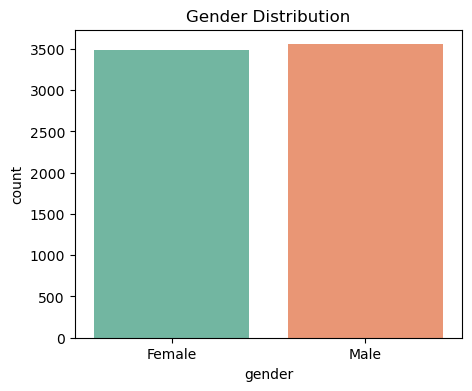

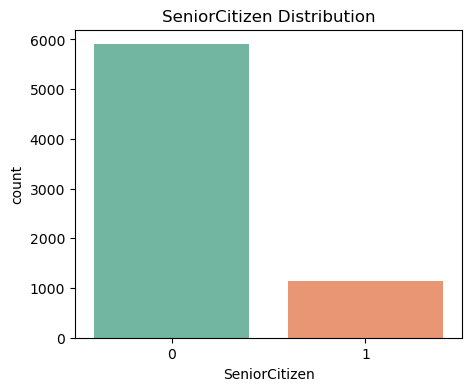

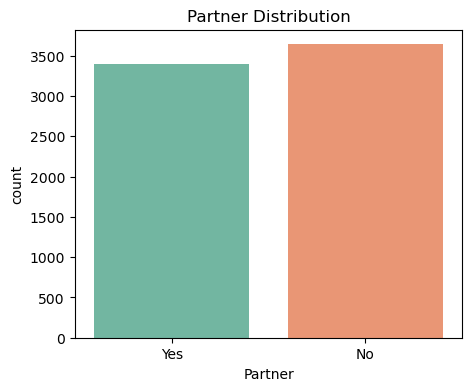

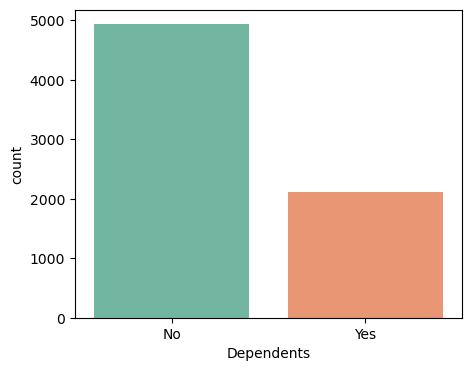

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical Features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Count Plot for Gender
plt.figure(figsize=(5, 4))
sns.countplot(data=df_churn, x='gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()

# Count Plot for SeniorCitizen
plt.figure(figsize=(5, 4))
sns.countplot(data=df_churn, x='SeniorCitizen', palette='Set2')
plt.title('SeniorCitizen Distribution')
plt.show()

# Count Plot for Partner
plt.figure(figsize=(5, 4))
sns.countplot(data=df_churn, x='Partner', palette='Set2')
plt.title('Partner Distribution')
plt.show()

# Count Plot for Dependents
plt.figure(figsize=(5, 4))
sns.countplot(data=df_churn, x='Dependents', palette='Set2')
plt.show()


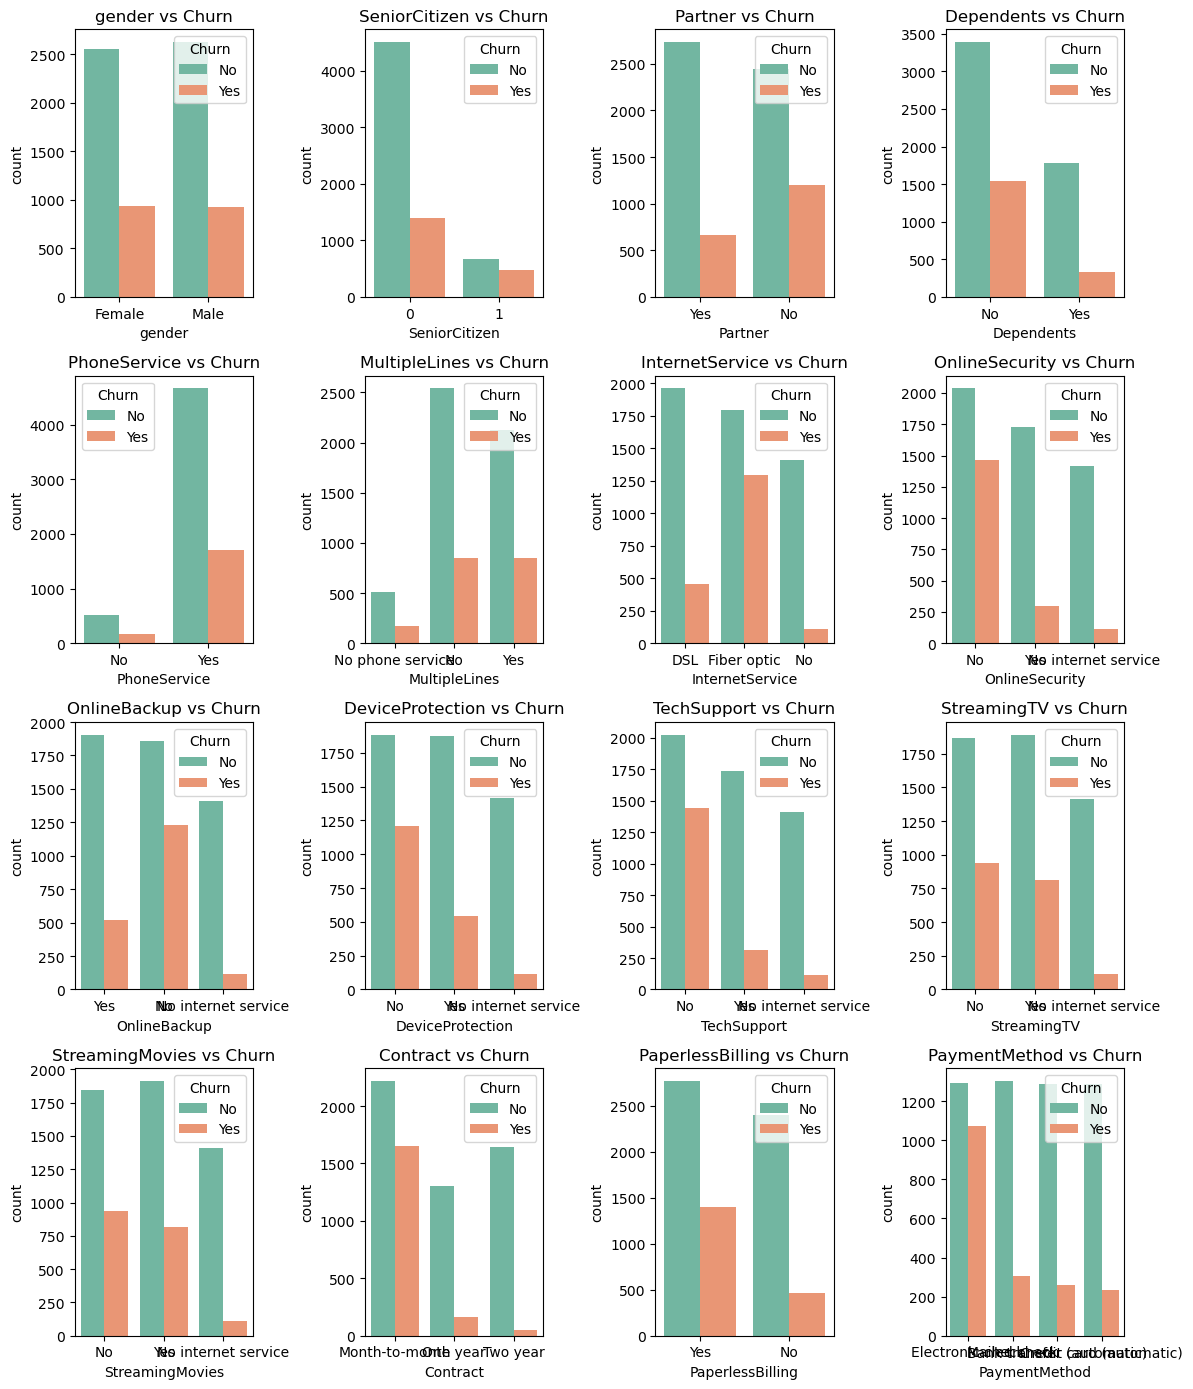

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical Features can be Compared with churn
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# using loop for Individual Bar Plots
plt.figure(figsize=(12, 14))
for i, feature in zip(range(1, len(categorical_features)+1), categorical_features):
    plt.subplot(4, 4, i)
    sns.countplot(data=df_churn, x=feature, hue='Churn', palette='Set2')
    plt.title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()


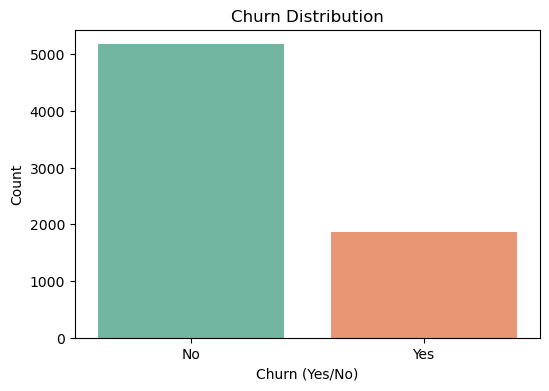

In [16]:
#countplot for target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df_churn, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Count')
plt.show()

In [17]:
df_churn=df_churn.drop('customerID',axis=1)

In [18]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
varlist=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
def binary_map(x):
    return x.map({'Yes':1,'No':0})
df_churn[varlist]=df_churn[varlist].apply(binary_map)

In [20]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [21]:
var_dum=pd.get_dummies(df_churn[['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']],drop_first=True,dtype=int)
df_churn=pd.concat([df_churn,var_dum],axis=1)

In [22]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
df_churn.shape

(7043, 42)

In [24]:
df_churn.drop(['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'],axis=1,inplace=True)
df_churn.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
df_churn.shape

(7043, 31)

In [26]:
df_churn.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                int32
MultipleLines_No phone service             int32
MultipleLines_Yes                          int32
InternetService_Fiber optic                int32
InternetService_No                         int32
OnlineSecurity_No internet service         int32
OnlineSecurity_Yes                         int32
OnlineBackup_No internet service           int32
OnlineBackup_Yes                           int32
DeviceProtection_No internet service       int32
DeviceProtection_Yes                       int32
TechSupport_No inter

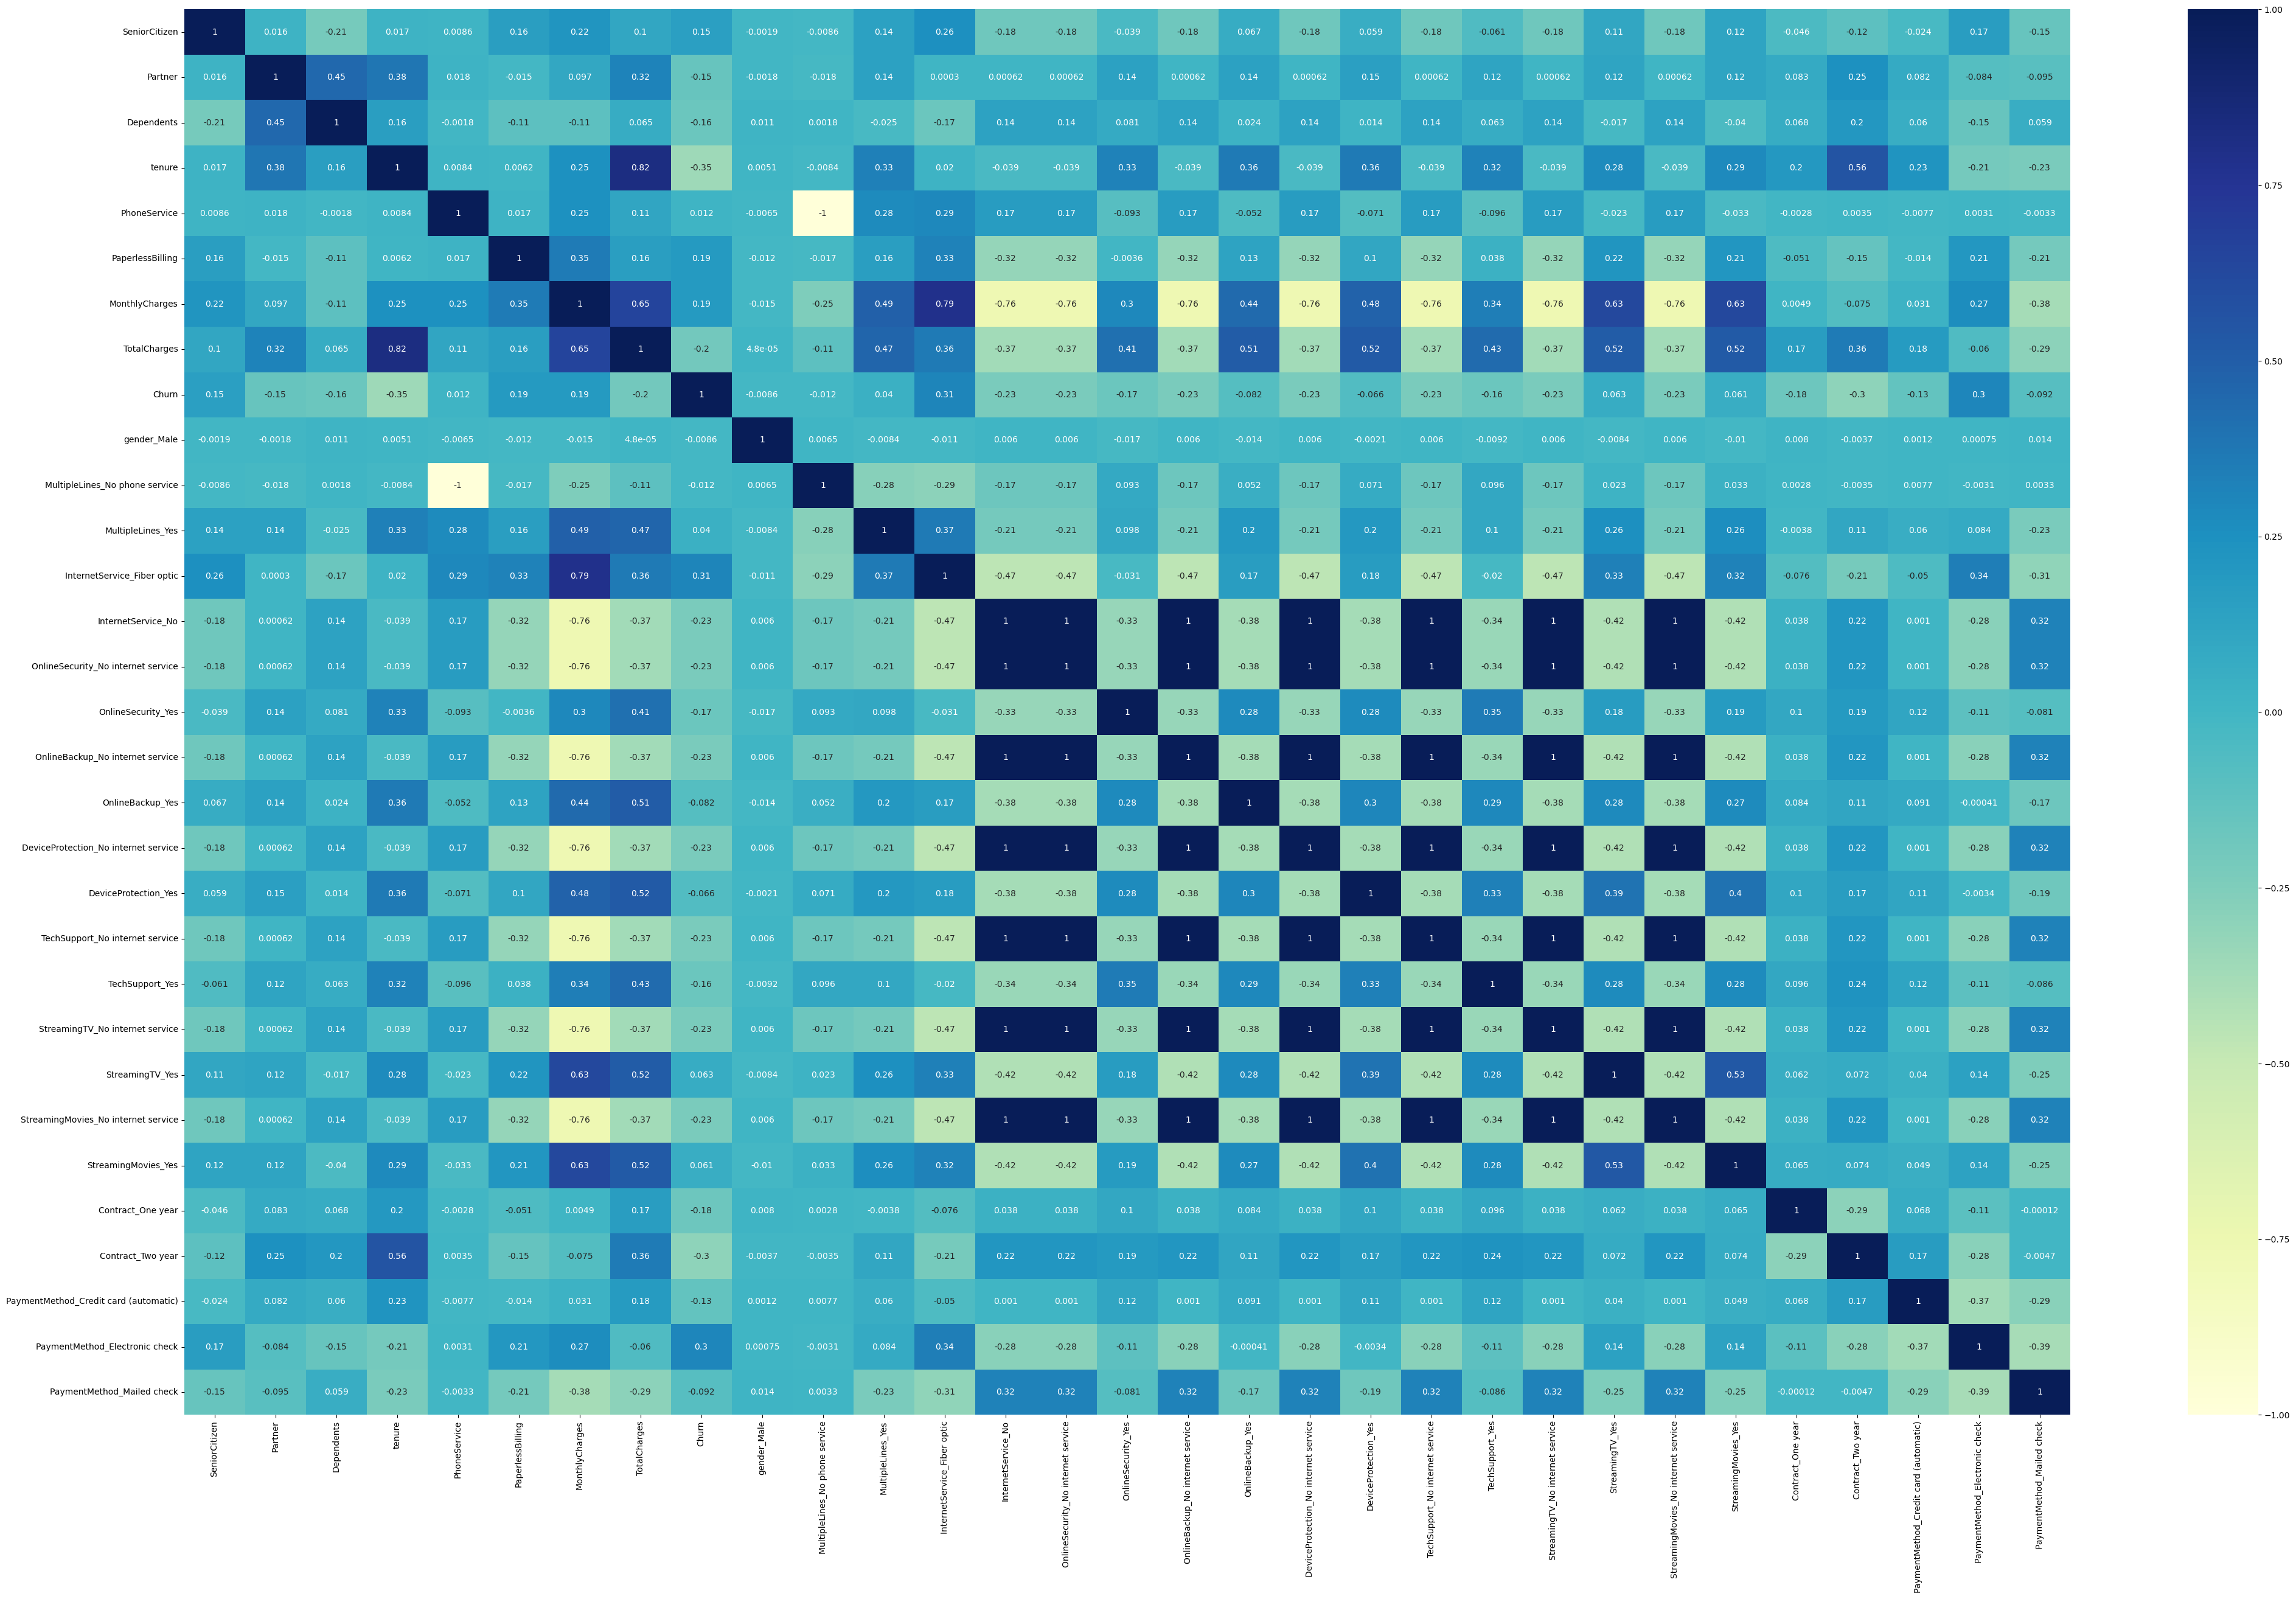

In [27]:
plt.figure(figsize=(50,30))
sns.heatmap(df_churn.corr(),annot=True,cmap="YlGnBu")
plt.show()

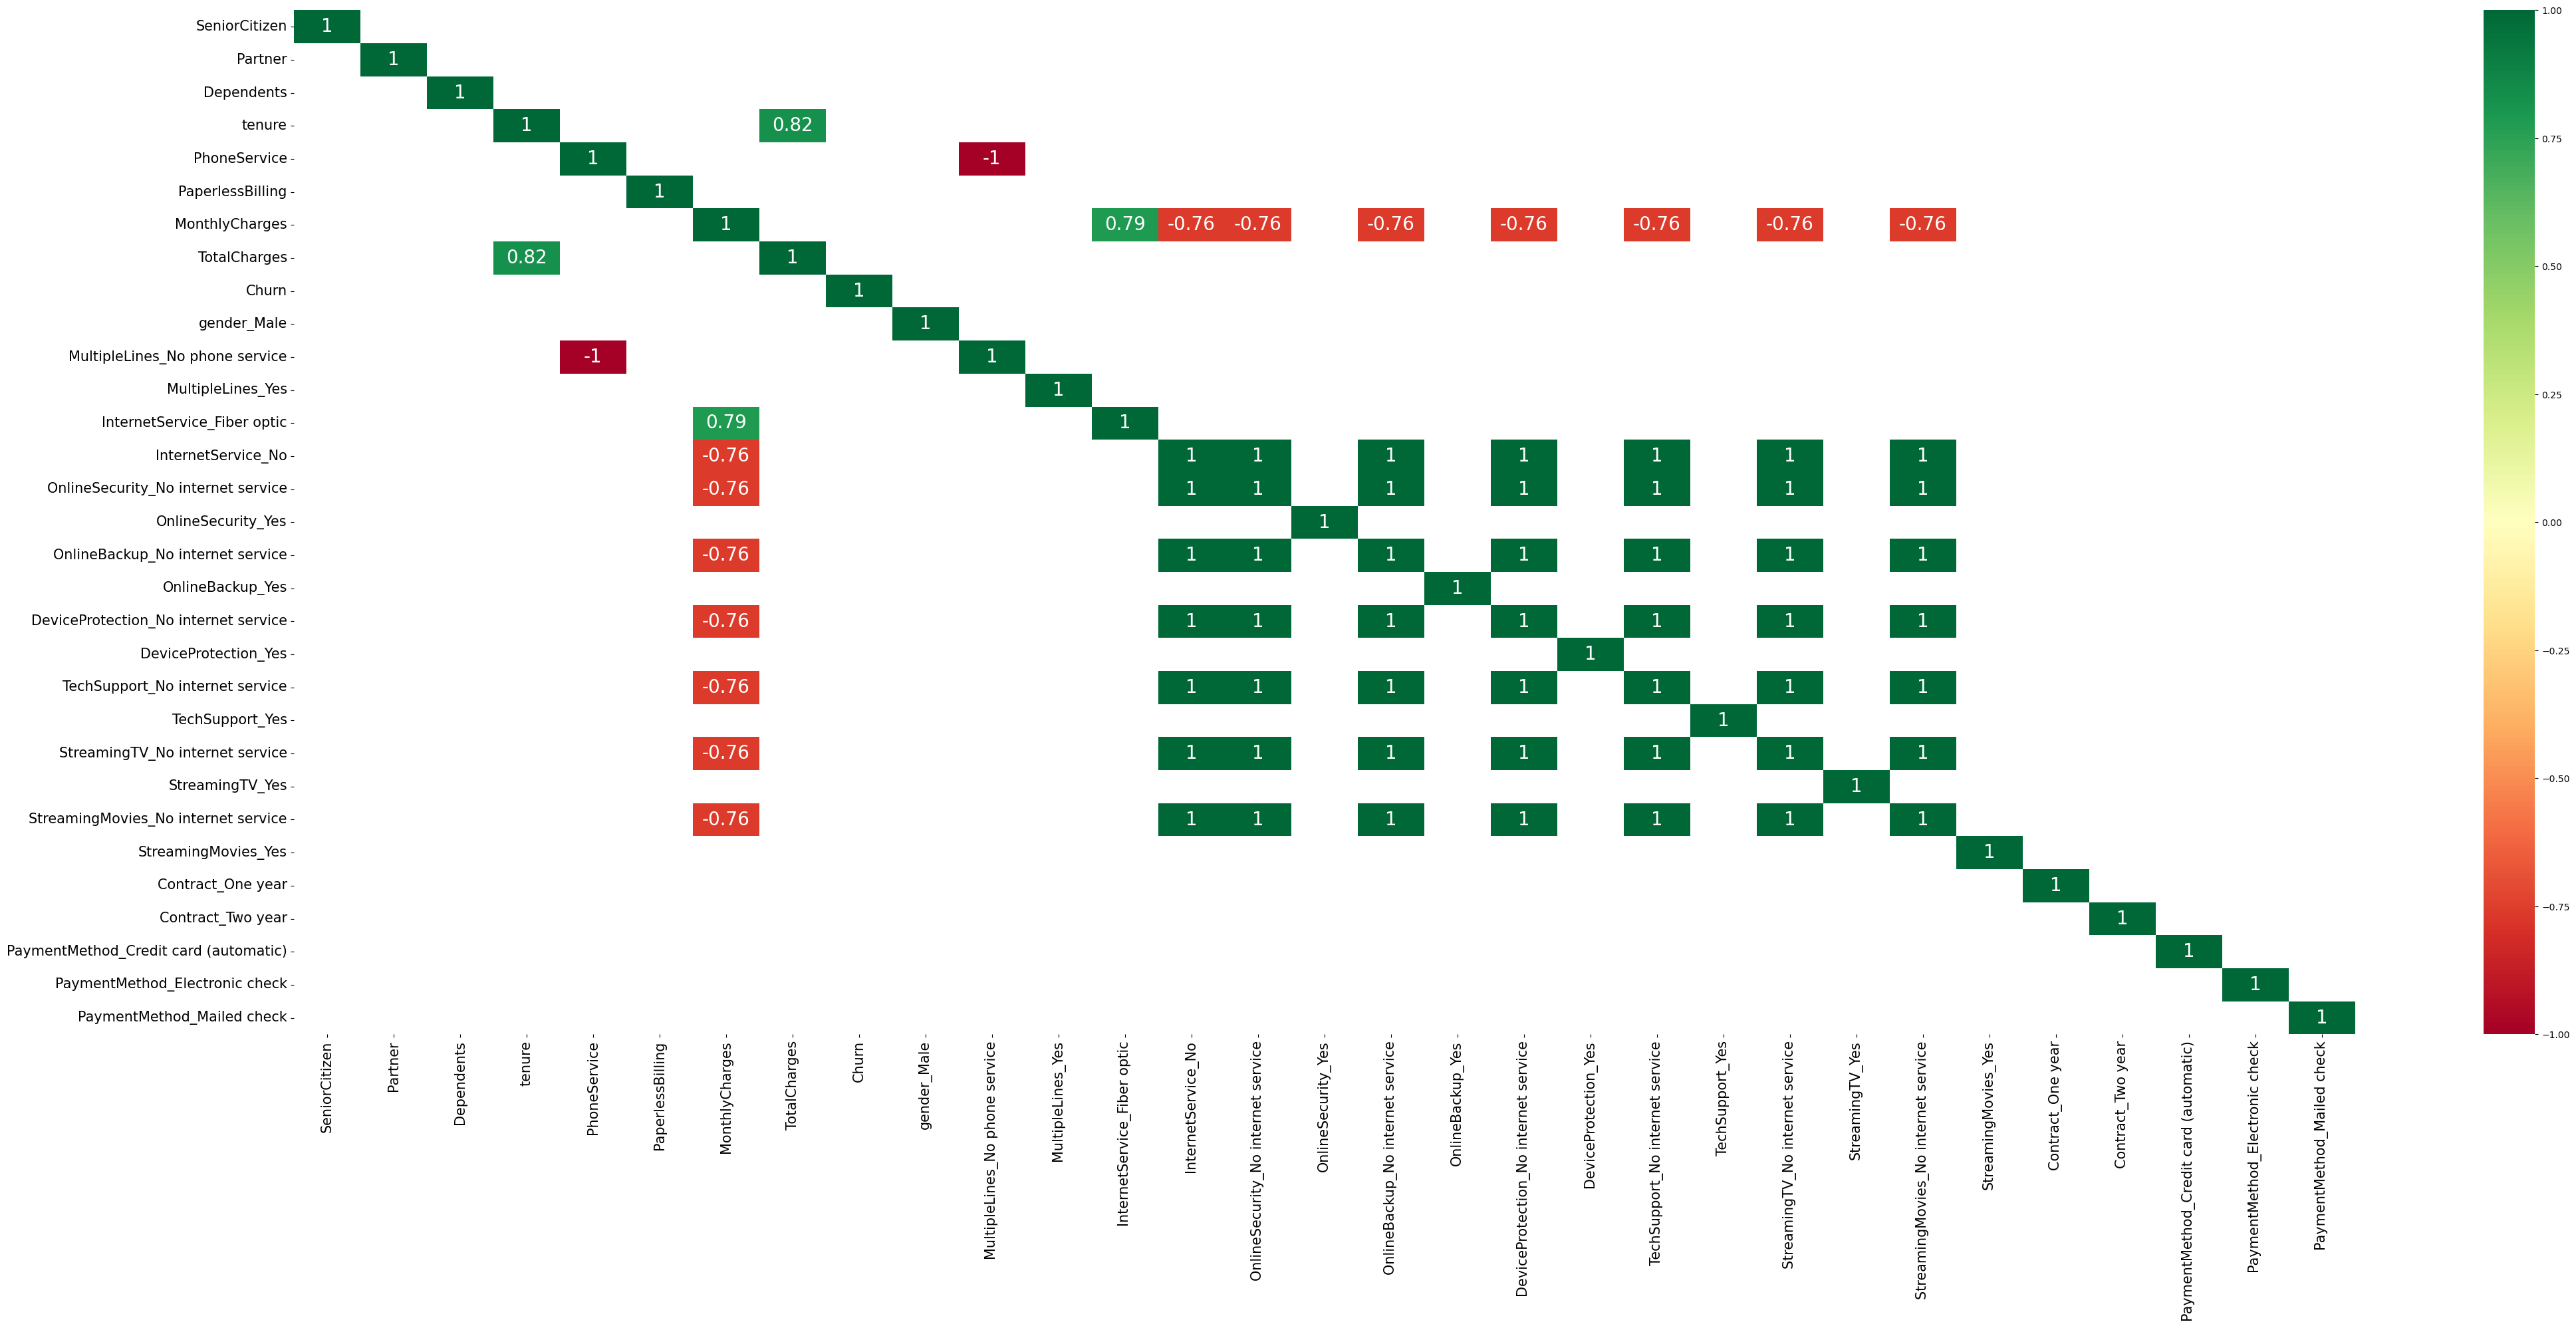

In [28]:
corr=df_churn.corr()
# set figure size
plt.figure(figsize=(50, 20))

# plot the heat map
# corr: give the correlation matrix
# pass the condition to get the strong correlation between the variables
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
#sns.set(font_scale=2)
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 20})

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

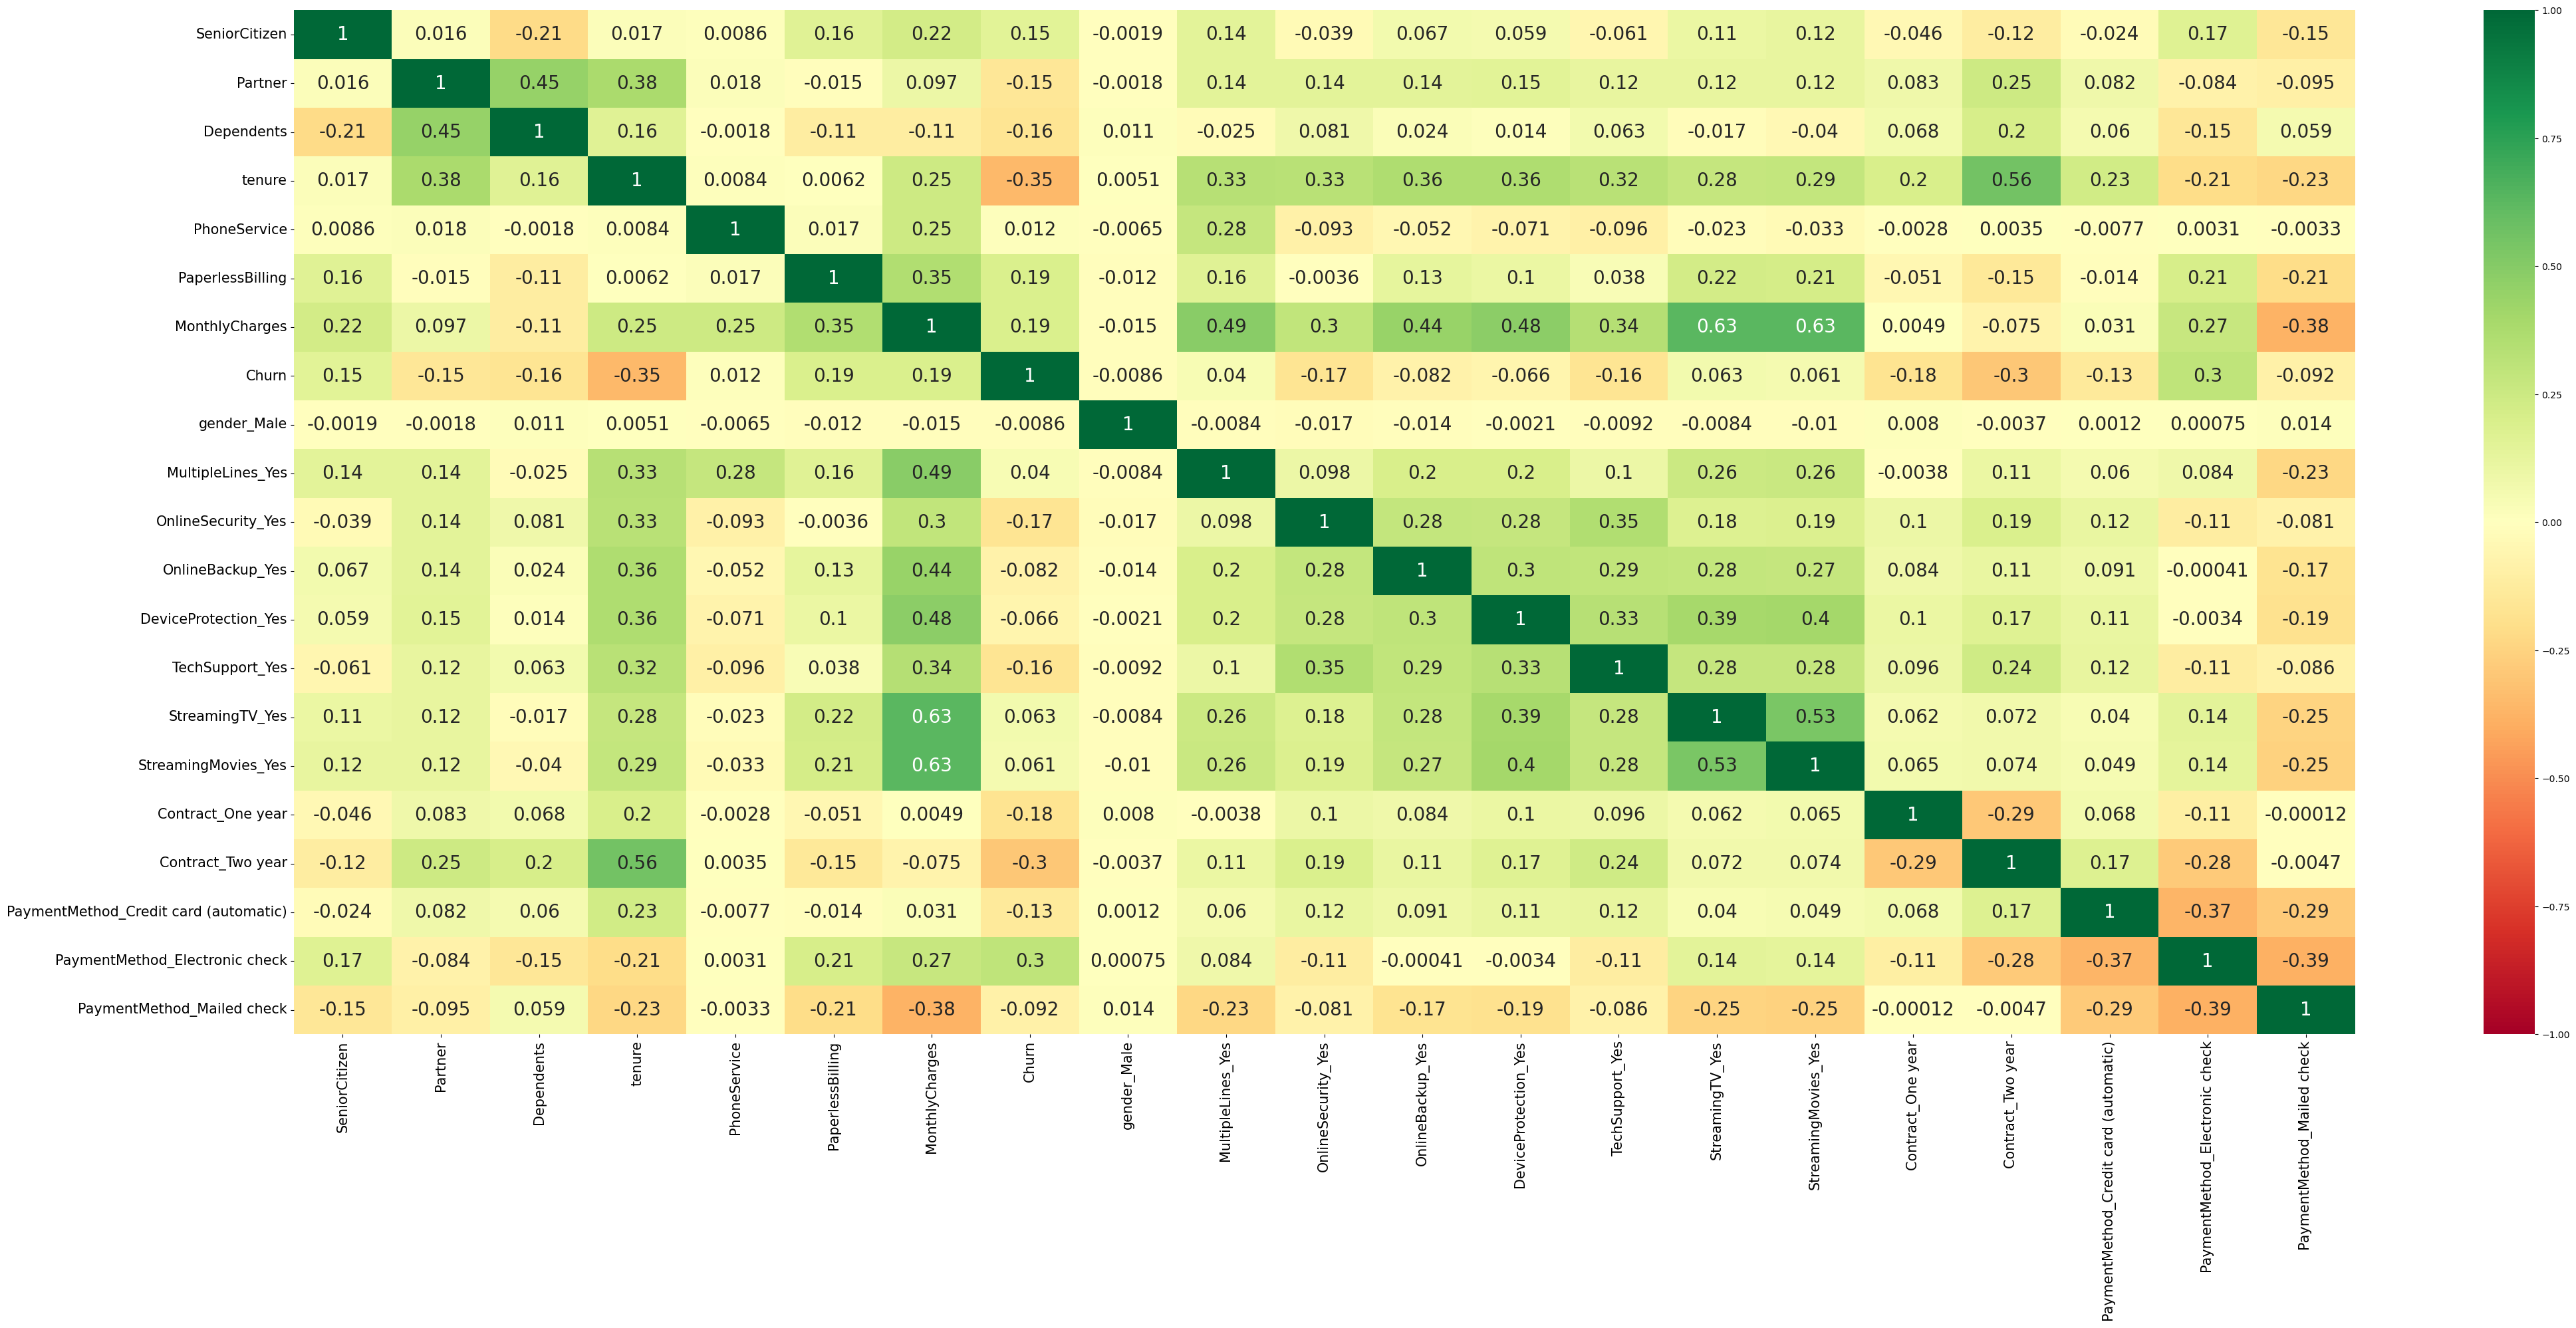

In [29]:
# Assuming 'df_churn' is your DataFrame

# Calculate the correlation matrix
corr_matrix = df_churn.corr()

# Set the range for correlation values to be kept
correlation_range = (-0.7, 0.7)  # Adjust as needed

# Identify columns with correlation values outside the specified range
cols_to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if not (correlation_range[0] <= abs(corr_value) <= correlation_range[1]):
            colname = corr_matrix.columns[i]
            cols_to_drop.add(colname)

# Drop the columns with correlation values outside the specified range
df_churn_filtered = df_churn.drop(cols_to_drop, axis=1)

# Display the heatmap after removal
plt.figure(figsize=(50, 20))
sns.heatmap(df_churn_filtered.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0, annot=True, annot_kws={"size": 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [30]:
df_churn_filtered.columns.tolist()

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'Churn',
 'gender_Male',
 'MultipleLines_Yes',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [31]:
# Given list
feature_list = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'Churn', 'gender_Male', 'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Check if 'TotalCharges' is in the list
if 'TotalCharges' in feature_list:
    print("TotalCharges is present in the list.")
else:
    print("TotalCharges is not present in the list.")


TotalCharges is not present in the list.


In [32]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df_churn_filtered,train_size=0.7,test_size=0.3,random_state=100)
df_churn.shape

(7043, 31)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['SeniorCitizen','tenure','MonthlyCharges']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
877,0.0,0,1,0.708333,0,0,0.417539,0,0,0,1,0,1,1,1,1,1,0,0,0,0
5792,1.0,0,0,0.208333,1,1,0.777778,1,0,0,1,0,1,1,0,1,0,0,0,0,1
5334,0.0,1,1,0.680556,1,1,0.893871,1,0,1,0,1,1,1,1,1,0,1,0,0,0
878,0.0,0,0,0.833333,1,0,0.463378,0,0,1,1,0,1,1,0,0,1,0,0,1,0
6578,0.0,0,1,0.138889,1,0,0.551071,0,0,1,1,0,1,1,0,1,1,0,1,0,0


In [34]:
df_train.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,0.161055,0.477282,0.302028,0.450882,0.902637,0.592698,0.461334,0.264300,0.503854,0.421095,0.286815,0.347667,0.341176,0.293103,0.384178,0.389249,0.210751,0.245233,0.215213,0.335497,0.229412
std,0.367619,0.499534,0.459184,0.341291,0.296482,0.491382,0.300891,0.441005,0.500036,0.493785,0.452320,0.476278,0.474153,0.455232,0.486450,0.487630,0.407883,0.430269,0.411012,0.472212,0.420497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.164923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.402778,1.000000,1.000000,0.518685,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.777778,1.000000,1.000000,0.712008,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
y_train=df_train.pop('Churn')
x_train=df_train

In [36]:
y_train.head()

877     0
5792    1
5334    1
878     0
6578    0
Name: Churn, dtype: int64

In [37]:
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
877,0.0,0,1,0.708333,0,0,0.417539,0,0,1,0,1,1,1,1,1,0,0,0,0
5792,1.0,0,0,0.208333,1,1,0.777778,0,0,1,0,1,1,0,1,0,0,0,0,1
5334,0.0,1,1,0.680556,1,1,0.893871,0,1,0,1,1,1,1,1,0,1,0,0,0
878,0.0,0,0,0.833333,1,0,0.463378,0,1,1,0,1,1,0,0,1,0,0,1,0
6578,0.0,0,1,0.138889,1,0,0.551071,0,1,1,0,1,1,0,1,1,0,1,0,0


In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
x_train.head()

,const,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
877,1.0,0.0,0,1,0.708333,0,0,0.417539,0,0,1,0,1,1,1,1,1,0,0,0,0
5792,1.0,1.0,0,0,0.208333,1,1,0.777778,0,0,1,0,1,1,0,1,0,0,0,0,1
5334,1.0,0.0,1,1,0.680556,1,1,0.893871,0,1,0,1,1,1,1,1,0,1,0,0,0
878,1.0,0.0,0,0,0.833333,1,0,0.463378,0,1,1,0,1,1,0,0,1,0,0,1,0
6578,1.0,0.0,0,1,0.138889,1,0,0.551071,0,1,1,0,1,1,0,1,1,0,1,0,0


In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels
import statsmodels.api as sm
logistic=sm.Logit(y_train,x_train).fit()
print(logistic.summary())

Optimization terminated successfully.
         Current function value: 0.408839
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4909
Method:                           MLE   Df Model:                           20
Date:                Tue, 30 Jan 2024   Pseudo R-squ.:                  0.2921
Time:                        08:53:27   Log-Likelihood:                -2015.6
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3682      

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['SeniorCitizen','tenure','MonthlyCharges']
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])
df_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,0.0,1,0,0.694444,1,0,0.019960,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1541,0.0,0,0,1.000000,1,0,0.012974,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1289,0.0,0,0,0.875000,1,0,0.501497,0,1,1,1,1,1,1,0,0,1,0,0,0,0
5745,0.0,1,1,0.847222,1,1,0.056387,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4873,0.0,0,0,0.097222,1,0,0.007485,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
df_test.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.164695,0.496451,0.293895,0.446607,0.904401,0.591103,0.466243,0.267866,0.506862,0.423568,0.286323,0.338381,0.350213,0.283483,0.384761,0.384761,0.205395,0.230005,0.218173,0.336488,0.227638
std,0.370993,0.500106,0.455652,0.340729,0.294110,0.491747,0.297866,0.442952,0.500071,0.494241,0.452149,0.473271,0.477149,0.450796,0.486654,0.486654,0.404086,0.420935,0.413103,0.472620,0.419407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.111111,1.000000,0.000000,0.210579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.402778,1.000000,1.000000,0.517465,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.717066,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
y_test=df_test.pop('Churn')
x_test=df_test

In [43]:
y_test.head()

4880    0
1541    0
1289    0
5745    0
4873    0
Name: Churn, dtype: int64

In [44]:
x_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,0.0,1,0,0.694444,1,0,0.019960,1,0,0,0,0,0,0,0,0,1,0,0,1
1541,0.0,0,0,1.000000,1,0,0.012974,1,0,0,0,0,0,0,0,0,1,0,0,0
1289,0.0,0,0,0.875000,1,0,0.501497,1,1,1,1,1,1,0,0,1,0,0,0,0
5745,0.0,1,1,0.847222,1,1,0.056387,0,1,0,0,0,0,0,0,0,1,0,0,1
4873,0.0,0,0,0.097222,1,0,0.007485,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels
import statsmodels.api as sm
x_test=sm.add_constant(x_test)
x_test.head()

,const,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,1.0,0.0,1,0,0.694444,1,0,0.019960,1,0,0,0,0,0,0,0,0,1,0,0,1
1541,1.0,0.0,0,0,1.000000,1,0,0.012974,1,0,0,0,0,0,0,0,0,1,0,0,0
1289,1.0,0.0,0,0,0.875000,1,0,0.501497,1,1,1,1,1,1,0,0,1,0,0,0,0
5745,1.0,0.0,1,1,0.847222,1,1,0.056387,0,1,0,0,0,0,0,0,0,1,0,0,1
4873,1.0,0.0,0,0,0.097222,1,0,0.007485,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
y_pred_pro=logistic.predict(x_test)
y_pred_pro.head()

4880    0.010317
1541    0.004902
1289    0.016366
5745    0.011239
4873    0.137471
dtype: float64

In [47]:
y_pred=['0' if x < 0.5 else '1' for x in y_pred_pro]

In [48]:
y_pred=np.array(y_pred,dtype=np.float32)
y_pred[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

In [49]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype


In [50]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [51]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))
#The kappa statistic is a measure of how closely the instances classified by the machine learning
#classifier matched the data labeled as ground truth, controlling for the accuracy of a random
#classifier as measured by the expected accuracy.
#kappas > 0.75 as excellent, 0.40-0.75 as fair to good, and < 0.40 as poor.

In [52]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [53]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, _  = roc_curve(y_test, y_pred_pro)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Churn Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_pro),4)))

    # plot the grid
    plt.grid(True)

In [54]:
    # create an empty dataframe to store the scores for various classification algorithms
    score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

    # append the result table for all performance scores
    # performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy',
    #'Kappa Score', and 'f1-score'
    # compile the required information in a user defined function 
    def update_score_card(model_name):

        # assign 'score_card' as global variable
        global score_card

        # append the results to the dataframe 'score_card'
        # 'ignore_index = True' do not consider the index labels
        score_card = score_card._append({'Model': model_name,
                                        'AUC Score' : roc_auc_score(y_test, y_pred_pro),
                                        'Precision Score': metrics.precision_score(y_test, y_pred),
                                        'Recall Score': metrics.recall_score(y_test, y_pred),
                                        'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                        'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                        'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                        ignore_index = True)
        return(score_card)

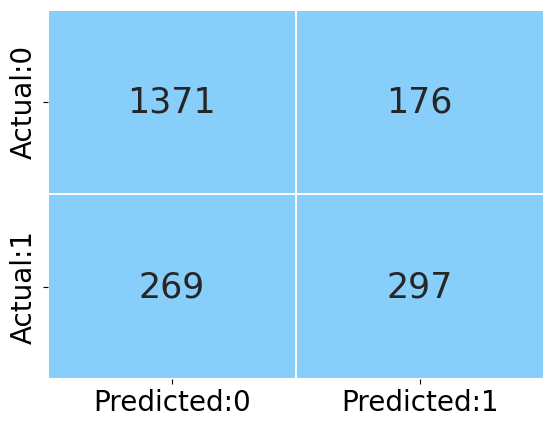

In [55]:
plot_confusion_matrix(logistic)

In [56]:
test_report=get_test_report(logistic)

In [57]:
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1547
           1       0.63      0.52      0.57       566

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



In [58]:
kappa_value=kappa_score(logistic)
print(kappa_value)

0.43355335725744604


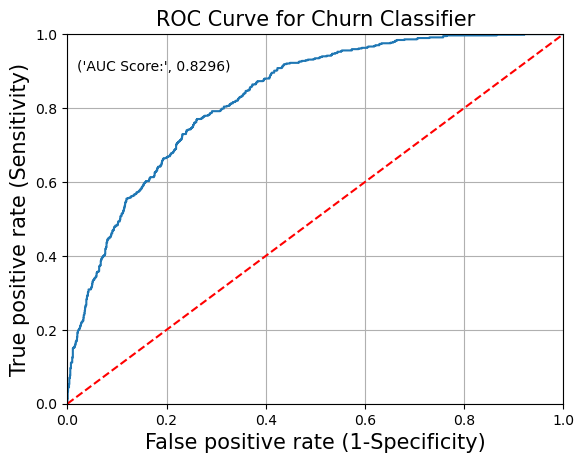

In [59]:
plot_roc(logistic)

In [60]:
update_score_card(model_name='Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.829588,0.627907,0.524735,0.789399,0.433553,0.571704


In [61]:
from sklearn.linear_model import SGDClassifier

# Assuming x_train and y_train are your training data
SGD = SGDClassifier(loss='log_loss', random_state=10)
logistic_with_SGD = SGD.fit(x_train, y_train)

In [62]:
y_pred_pro=logistic_with_SGD.predict_proba(x_test)[:,1]
y_pred_pro


array([0.0054434 , 0.00427944, 0.01813642, ..., 0.71297481, 0.31169744,
       0.004302  ])

In [63]:
y_pred=logistic_with_SGD.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

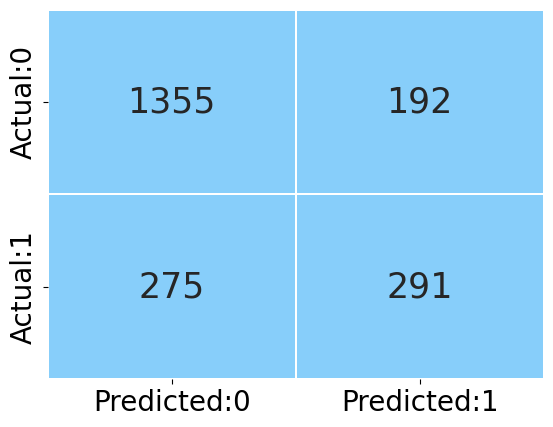

In [64]:
plot_confusion_matrix(logistic_with_SGD)

In [65]:
test_report=get_test_report(logistic_with_SGD)
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1547
           1       0.60      0.51      0.55       566

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [66]:
kappa_value=kappa_score(logistic_with_SGD)
print(kappa_value)

0.40904166474525705


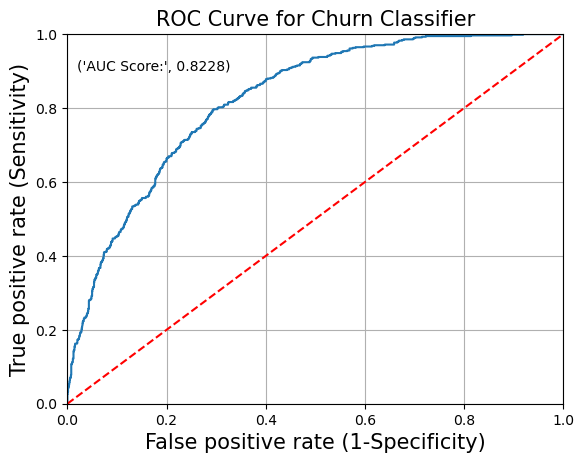

In [67]:
plot_roc(logistic_with_SGD)

In [68]:
update_score_card(model_name='Logistic Regression (SGD)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.829588,0.627907,0.524735,0.789399,0.433553,0.571704
1,Logistic Regression (SGD),0.822812,0.602484,0.514134,0.778987,0.409042,0.554814


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [70]:
rf_reg=RandomForestClassifier(n_estimators=100,random_state=10)
rf_reg.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [71]:
y_pred=rf_reg.predict(x_test)

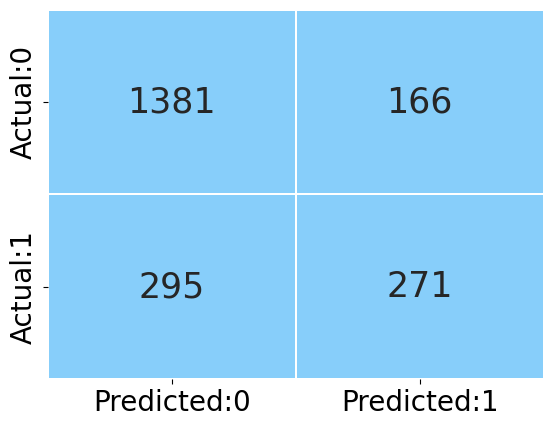

In [72]:
plot_confusion_matrix(rf_reg)

In [73]:
test_report=get_test_report(rf_reg)
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1547
           1       0.62      0.48      0.54       566

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [74]:
kappa_value=kappa_score(rf_reg)
print(kappa_value)

0.40043086070581135


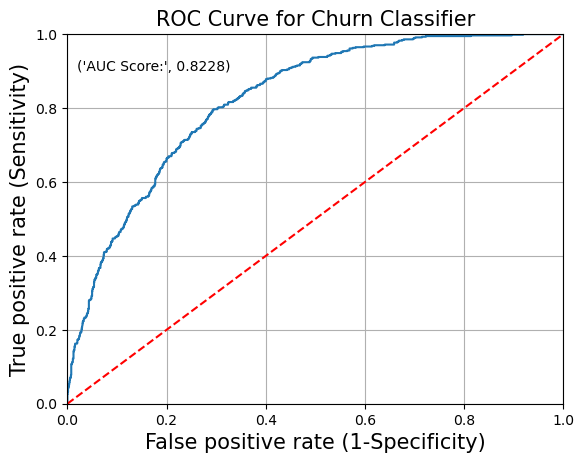

In [75]:
plot_roc(rf_reg)

In [76]:
update_score_card(model_name='Random Forest')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.829588,0.627907,0.524735,0.789399,0.433553,0.571704
1,Logistic Regression (SGD),0.822812,0.602484,0.514134,0.778987,0.409042,0.554814
2,Random Forest,0.822812,0.620137,0.478799,0.781827,0.400431,0.540379


In [77]:
tuned_parameters=[{'n_estimators':[85,100],
                  'min_samples_split':[15,20],
                  'max_depth':[8,10],
                  'min_samples_leaf':[5,10],
                  'max_leaf_nodes':[10,15]}]

In [78]:
rf_reg_CV=RandomForestClassifier(random_state=10)
grid=GridSearchCV(estimator=rf_reg_CV,param_grid=tuned_parameters,cv=10)
dt_grid=grid.fit(x_train,y_train)
print(dt_grid.best_params_, '\n')

{'max_depth': 8, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100} 



In [79]:
dt_grid_model=RandomForestClassifier(n_estimators=dt_grid.best_params_.get('n_estimators'),
                                    max_depth=dt_grid.best_params_.get('max_depth'),
                                    max_leaf_nodes=dt_grid.best_params_.get('max_leaf_nodes'),
                                    min_samples_leaf=dt_grid.best_params_.get('min_samples_leaf'),
                                    min_samples_split=dt_grid.best_params_.get('min_samples_split'),
                                    random_state=10)
dt_grid_model=dt_grid_model.fit(x_train,y_train)

In [80]:
y_pred=dt_grid_model.predict(x_test)

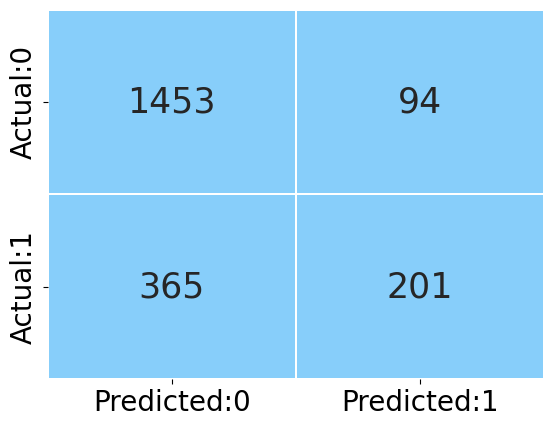

In [110]:
plot_confusion_matrix(dt_grid_model)

In [111]:
test_report=get_test_report(dt_grid_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1547
           1       0.68      0.36      0.47       566

    accuracy                           0.78      2113
   macro avg       0.74      0.65      0.67      2113
weighted avg       0.77      0.78      0.76      2113



In [112]:
kappa_value=kappa_score(dt_grid_model)
print(kappa_value)

0.34704612304280535


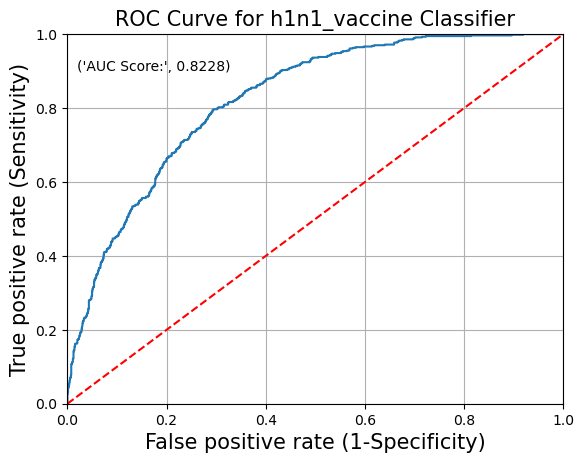

In [114]:
plot_roc(dt_grid_model)

In [115]:
update_score_card(model_name='Random Forest with Tunned Parametres')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.829588,0.627907,0.524735,0.789399,0.433553,0.571704
1,Logistic Regression (SGD),0.822812,0.602484,0.514134,0.778987,0.409042,0.554814
2,Random Forest,0.822812,0.620137,0.478799,0.781827,0.400431,0.540379
3,Random Forest with Tunned Parametres,0.822812,0.681356,0.355124,0.782773,0.347046,0.466899
